<a href="https://colab.research.google.com/github/renaldfredy/Thesis/blob/main/Attempt_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cluster 0

#Vanila GRU
 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pip install attention

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.initializers import RandomNormal
# from keras.layers import Conv1D, MaxPooling2D
# from attention import Attention
import warnings
import pickle
warnings.filterwarnings("ignore")

In [4]:
# trying open dataset

pickle_in_tr_0 =open("/content/drive/MyDrive/Renald/Preprosessing_data/Data_Train_0_3D.pickle",'rb')
Xtrain_0 = pickle.load(pickle_in_tr_0)

pickle_in_val_0 =open("/content/drive/MyDrive/Renald/Preprosessing_data/Data_Val_0_3D.pickle",'rb')
Xval_0 = pickle.load(pickle_in_val_0)

pickle_in_ts_0 =open("/content/drive/MyDrive/Renald/Preprosessing_data/Data_Test_0_3D.pickle",'rb')
Xtest_0 = pickle.load(pickle_in_ts_0)

print(Xtrain_0)
print(Xtrain_0.shape)
print(Xval_0.shape)
print(Xtest_0.shape)

[[[467.08679199 450.50921631 450.49346924 ... 464.22116089 454.07312012
   455.53564453]
  [450.50921631 450.49346924 445.04946899 ... 454.07312012 455.53564453
   445.81433105]
  [450.49346924 445.04946899 445.88006592 ... 455.53564453 445.81433105
   453.04754639]
  ...
  [280.78036499 271.8822937  268.40631104 ... 285.31814575 277.07159424
   273.3475647 ]
  [292.4130249  284.33309937 278.48321533 ... 288.60446167 285.13067627
   276.05865479]
  [284.33309937 278.48321533 274.9407959  ... 285.13067627 276.05865479
   272.96160889]]

 [[329.5536499  332.11071777 325.16543579 ... 314.42929077 315.85400391
   303.50509644]
  [332.11071777 325.16543579 333.94659424 ... 315.85400391 303.50509644
   299.27453613]
  [325.16543579 333.94659424 329.38677979 ... 303.50509644 299.27453613
   319.88577271]
  ...
  [261.80465698 250.22265625 246.72174072 ... 247.2723999  237.8548584
   235.16853333]
  [256.03302002 248.66741943 239.85076904 ... 250.49841309 244.94378662
   238.40670776]
  [248.6

In [5]:
# import numpy as np
# from scipy.ndimage.interpolation import shift

Xtrain_0_transpose = np.transpose(Xtrain_0, (1, 0, 2))
Xval_0_transpose = np.transpose(Xval_0, (1, 0, 2))
Xtest_0_transpose = np.transpose(Xtest_0, (1, 0, 2))
Xtrain_0_transpose.shape

(779, 288, 9)

In [6]:
print('The minimum value in Cluster 0: ', Xtrain_0_transpose.min())
print('The maximum value in Cluster 0: ', Xtrain_0_transpose.max())
print('The average value in Cluster 0: ', np.average(Xtrain_0_transpose))

The minimum value in Cluster 0:  5.002902030944824
The maximum value in Cluster 0:  889.7767944335938
The average value in Cluster 0:  249.76983663058218


In [7]:
pd.DataFrame(Xtrain_0_transpose[0,:,:])

,0,1,2,3,4,5,6,7,8
0,467.086792,450.509216,450.493469,463.481934,463.987152,463.586304,464.221161,454.073120,455.535645
1,329.553650,332.110718,325.165436,323.138031,323.946747,319.100983,314.429291,315.854004,303.505096
2,191.304688,194.310349,203.168213,202.327225,205.625854,213.830566,176.942657,181.324371,209.248688
3,256.511261,251.699554,267.314087,243.805115,245.511902,236.010803,235.431396,237.056396,260.986267
4,279.643127,282.230225,272.270935,316.828491,316.661316,316.682556,312.520203,317.095947,324.420502
...,...,...,...,...,...,...,...,...,...
283,60.454823,59.164959,56.321915,55.674461,55.289906,55.024635,51.097076,52.276787,51.822144
284,172.461365,176.396820,169.387512,163.660828,167.206573,169.016296,155.282013,156.945465,152.179138
285,496.523712,474.888702,442.202393,452.599274,436.002808,429.640381,437.117737,416.009094,408.426270
286,495.616272,490.365662,472.015747,517.323975,516.460815,506.097412,524.550171,525.824524,511.208405


In [8]:
data_x = Xtrain_0_transpose[0,:,:]
data_x

array([[467.08679199, 450.50921631, 450.49346924, ..., 464.22116089,
        454.07312012, 455.53564453],
       [329.5536499 , 332.11071777, 325.16543579, ..., 314.42929077,
        315.85400391, 303.50509644],
       [191.3046875 , 194.31034851, 203.16821289, ..., 176.94265747,
        181.32437134, 209.24868774],
       ...,
       [496.52371216, 474.88870239, 442.20239258, ..., 437.11773682,
        416.00909424, 408.42626953],
       [495.61627197, 490.36566162, 472.01574707, ..., 524.5501709 ,
        525.82452393, 511.20840454],
       [486.00543213, 460.50759888, 448.29470825, ..., 473.24786377,
        447.20809937, 448.11706543]])

In [9]:
data_train = []
data_ytrain = []
data_xval = []
data_yval = []
data_xtest = []
data_ytest = []

for j in range (0,779):
  data_x = Xtrain_0_transpose[j,:,:]
  data_train.append(data_x)
  data_y = Xtrain_0_transpose[[j],:,[4]].reshape(288,1)
  data_ytrain.append(data_y)
  data_val_x =  Xval_0_transpose[j,:,:]
  data_xval.append(data_val_x)
  data_val_y = Xval_0_transpose[[j],:,[4]].reshape(96,1)
  data_yval.append(data_val_y)
  data_test_x =  Xtest_0_transpose[j,:,:]
  data_xtest.append(data_test_x)
  data_test_y = Xtest_0_transpose[[j],:,[4]].reshape(96,1)
  data_ytest.append(data_test_y)

print(data_train[0].shape)
print(data_ytrain[0].shape)
print(data_xval[0].shape)
print(data_yval[0].shape)
print(data_xtest[0].shape)
print(data_ytest[0].shape)


(288, 9)
(288, 1)
(96, 9)
(96, 1)
(96, 9)
(96, 1)


In [10]:
scaler = StandardScaler()
n_input = 12
n_features = 9
batch_size = 12
data_gent = []
data_val_gent = []
data_test_gent = []

for k in range (0,779):
  data_train_scaled = scaler.fit_transform(data_train[k])
  generator = TimeseriesGenerator(data_train_scaled, data_ytrain[k], length=n_input, batch_size=batch_size, shuffle=True)
  data_gent.append(generator)
  validation_sequence = TimeseriesGenerator(data_xval[k], data_yval[k], length=n_input, batch_size=batch_size, shuffle=True)
  data_val_gent.append(validation_sequence)
  test_sequence = TimeseriesGenerator(data_xtest[k], data_ytest[k], length=n_input, batch_size=batch_size, shuffle=True)
  data_test_gent.append(test_sequence)



In [11]:

from keras.layers import Layer
from keras.layers import *
from keras.models import *
from keras import backend as K

class attention(Layer):
    def __init__(self, units=500, **kwargs):
        self.units = units
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    
    def get_config(self):
        config = super(attention, self).get_config()
        config.update({"units": self.units})
        return config
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [12]:
# data_gent.shape

In [13]:
Vanila_LSTM = Sequential()
Vanila_LSTM.add(GRU(128, input_shape=(n_input,n_features), return_sequences=True))
# Vanila_LSTM.add(LSTM(128, return_sequences=True))
# Vanila_LSTM.add(LSTM(128, return_sequences=True))
# Vanila_LSTM.add(SpatialDropout1D(0.2))
# ditambah dense layer (5) atau (8)
# Vanila_LSTM.add(attention(32))
# Vanila_LSTM.add(Dense(10, activation='ReLU', bias_initializer='zeros'))
Vanila_LSTM.add(Dense(1, activation='ReLU', bias_initializer='zeros'))
Vanila_LSTM.compile(optimizer='adam', loss='mean_absolute_error', metrics=[RootMeanSquaredError(), "mean_absolute_percentage_error"])
Vanila_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 128)           53376     
                                                                 
 dense (Dense)               (None, 12, 1)             129       
                                                                 
Total params: 53,505
Trainable params: 53,505
Non-trainable params: 0
_________________________________________________________________


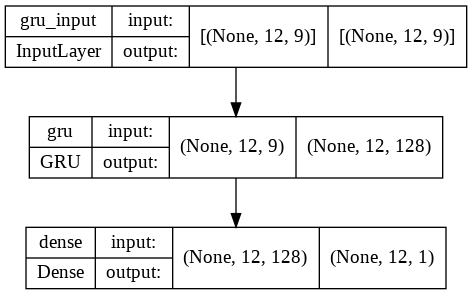

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(Vanila_LSTM, to_file='model_Vanila_LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
accum_lstm_history = []
for l in range(0,779):
  print('index: ',l)
  Vanila_LSTM_history = Vanila_LSTM.fit_generator(data_gent[l], validation_data=data_val_gent[l], epochs=1, shuffle=True, verbose=1) 
  accum_lstm_history.append(Vanila_LSTM_history)

index:  0
23/23 [==============================] - 7s 23ms/step - loss: 269.5765 - root_mean_squared_error: 288.2166 - mean_absolute_percentage_error: 99.4340 - val_loss: 290.8822 - val_root_mean_squared_error: 305.9075 - val_mean_absolute_percentage_error: 96.8989
index:  1
23/23 [==============================] - 0s 6ms/step - loss: 258.9004 - root_mean_squared_error: 279.0820 - mean_absolute_percentage_error: 96.7080 - val_loss: 280.4563 - val_root_mean_squared_error: 290.8943 - val_mean_absolute_percentage_error: 94.5150
index:  2
23/23 [==============================] - 0s 7ms/step - loss: 240.8687 - root_mean_squared_error: 260.5206 - mean_absolute_percentage_error: 93.7278 - val_loss: 262.7445 - val_root_mean_squared_error: 275.8012 - val_mean_absolute_percentage_error: 92.8056
index:  3
23/23 [==============================] - 0s 6ms/step - loss: 225.0833 - root_mean_squared_error: 247.2036 - mean_absolute_percentage_error: 91.4166 - val_loss: 251.9395 - val_root_mean_squared_e

In [16]:
accum_lstm_history[0].history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'mean_absolute_percentage_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_absolute_percentage_error'])

In [17]:
def plot_loss(history, title):
    history_loss = []
    history_val_loss = []
    for m in range (0,779):
      h_loss = history[m].history['loss']
      history_loss.append(h_loss)
      h_val_loss = history[m].history['val_loss']
      history_val_loss.append(h_val_loss)

    
    history_loss_array = np.array(history_loss)
    history_loss_all = history_loss_array.flatten()
    history_val_loss_array = np.array(history_val_loss)
    history_val_loss_all= history_val_loss_array.flatten()

    plt.figure(figsize=(10,6))
    plt.plot(history_loss_all, label='Train')
    plt.plot(history_val_loss_all, label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    loss = history_loss_all
    min_idx = np.argmin(loss)
    min_loss = loss[min_idx]
    print('Minimum loss of {} reached at epoch {}'.format(min_loss, min_idx))
    
    val_loss = history_val_loss_all
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

    val_loss = history_val_loss_all
    mean_idx = np.mean(val_loss)
    # mean_val_loss = val_loss[mean_idx]
    print('Average validation loss: ',mean_idx)

def plot_metrics_mape(history, title):

    history_metrics = []
    history_val_metrics = []
    for m in range (0,779):
      h_metrics = history[m].history['mean_absolute_percentage_error']
      # h_metrics = history[m].history['root_mean_squared_error']
      history_metrics.append(h_metrics)
      h_val_metrics = history[m].history['val_mean_absolute_percentage_error']
      # h_val_metrics = history[m].history['val_root_mean_squared_error']
      history_val_metrics.append(h_val_metrics)

    
    history_metrics_array = np.array(history_metrics)
    history_metrics_all = history_metrics_array.flatten()
    history_val_metrics_array = np.array(history_val_metrics)
    history_val_metrics_all= history_val_metrics_array.flatten()

    plt.figure(figsize=(10,6))
    plt.plot(history_metrics_all, label='Train')
    plt.plot(history_val_metrics_all, label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    metrics = history_metrics_all
    min_idx = np.argmin(metrics)
    min_metrics = metrics[min_idx]
    print('Minimum MAPE of {} reached at epoch {}'.format(min_metrics, min_idx))
    
    val_metrics = history_val_metrics_all
    min_idx = np.argmin(val_metrics)
    min_val_metrics = val_metrics[min_idx]
    print('Minimum validation MAPE of {} reached at epoch {}'.format(min_val_metrics, min_idx))

    val_metrics = history_val_metrics_all
    mean_idx = np.mean(val_metrics)
    # mean_val_metrics = val_metrics[min_idx]
    print('Average validation MAPE: ',mean_idx)

def plot_metrics_rmse(history, title):

    history_metrics = []
    history_val_metrics = []
    for m in range (0,779):
      # h_metrics = history[m].history['mean_absolute_error']
      h_metrics = history[m].history['root_mean_squared_error']
      history_metrics.append(h_metrics)
      # h_val_metrics = history[m].history['val_mean_absolute_error']
      h_val_metrics = history[m].history['val_root_mean_squared_error']
      history_val_metrics.append(h_val_metrics)

    
    history_metrics_array = np.array(history_metrics)
    history_metrics_all = history_metrics_array.flatten()
    history_val_metrics_array = np.array(history_val_metrics)
    history_val_metrics_all= history_val_metrics_array.flatten()

    plt.figure(figsize=(10,6))
    plt.plot(history_metrics_all, label='Train')
    plt.plot(history_val_metrics_all, label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    metrics = history_metrics_all
    min_idx = np.argmin(metrics)
    min_metrics = metrics[min_idx]
    print('Minimum RMSE of {} reached at epoch {}'.format(min_metrics, min_idx))
    
    val_metrics = history_val_metrics_all
    min_idx = np.argmin(val_metrics)
    min_val_metrics = val_metrics[min_idx]
    print('Minimum validation RMSE of {} reached at epoch {}'.format(min_val_metrics, min_idx))

    val_metrics = history_val_metrics_all
    mean_idx = np.mean(val_metrics)
    # mean_val_metrics = val_metrics[mean_idx]
    print('Average validation RMSE: ', mean_idx)

# van_lstm_hist[0].history['loss']


# # plt.plot(hist[0].history)
# hist_l = np.array(hist_loss)
# his_l_ = hist_l.flatten()
# hist_val_loss = np.array(hist_val_loss)
# hist_v = hist_val_loss.flatten()
# # plt.plot(hist)
# plt.plot(his_l_, label = 'train')
# plt.plot(hist_v, label = 'val')

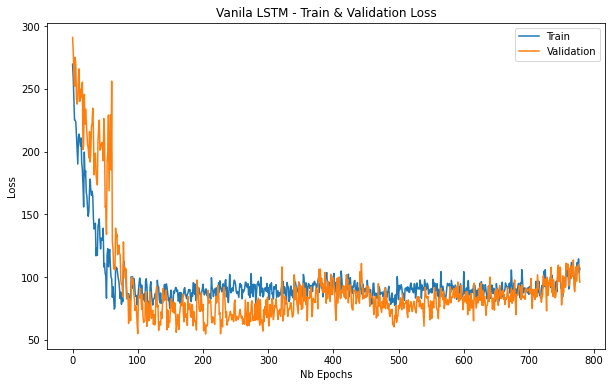

Minimum loss of 74.39586639404297 reached at epoch 64
Minimum validation loss of 54.57959747314453 reached at epoch 204
Average validation loss:  92.40169281280086


In [18]:
plot_loss(accum_lstm_history, 'Vanila LSTM - Train & Validation Loss')

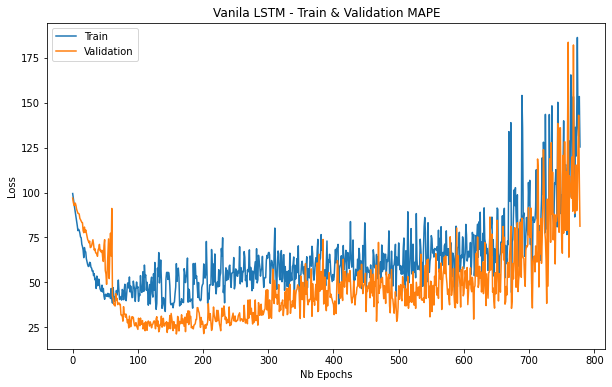

Minimum MAPE of 33.79476547241211 reached at epoch 142
Minimum validation MAPE of 21.272693634033203 reached at epoch 159
Average validation MAPE:  49.18970103869848


In [19]:
plot_metrics_mape(accum_lstm_history, 'Vanila LSTM - Train & Validation MAPE')

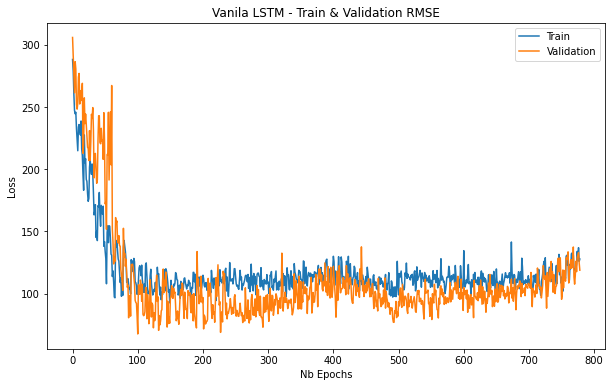

Minimum RMSE of 92.59280395507812 reached at epoch 149
Minimum validation RMSE of 67.56935119628906 reached at epoch 100
Average validation RMSE:  110.15554611734922


In [20]:
plot_metrics_rmse(accum_lstm_history, 'Vanila LSTM - Train & Validation RMSE')

#Evaluate

In [21]:
evaluation = []
for m in range (0,779):
  evaluated_LSTM = Vanila_LSTM.evaluate(data_test_gent[m])
  evaluation.append(evaluated_LSTM)

7/7 [==============================] - 0s 3ms/step - loss: 102.1773 - root_mean_squared_error: 128.2684 - mean_absolute_percentage_error: 133.1008


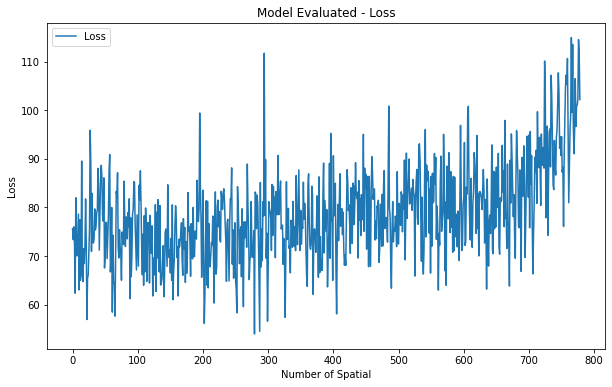

minimum Loss:  53.944915771484375
minimum Loss at epoch:  279
average:  78.6711450559643


In [22]:

# evaluation.shape

evaluation_array = np.array(evaluation)
# evaluation_flatten= evaluation_array.flatten()
evaluation_array.shape
eva = np.hsplit(evaluation_array,3)
eva[0]

plt.figure(figsize=(10,6))
plt.plot(eva[0], label='Loss')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Loss')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('minimum Loss: ', np.min(eva[0]))
print('minimum Loss at epoch: ',np.argmin(eva[0]))
print('average: ', np.mean(eva[0]))

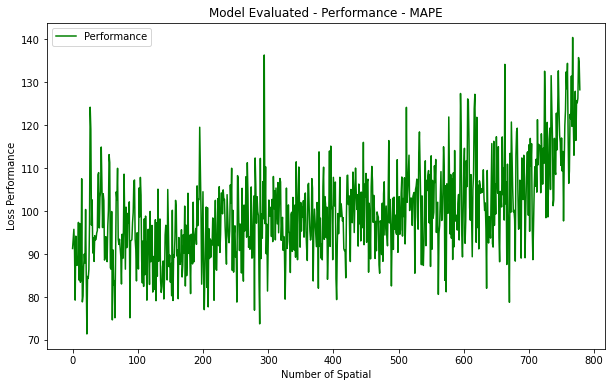

minimum MAPE:  71.37360382080078
minimum MAPE at epoch:  22
average:  99.68461718577629


In [23]:
plt.figure(figsize=(10,6))
plt.plot(eva[1], label='Performance', color='green')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Performance - MAPE')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss Performance')
plt.legend()
plt.show()
print('minimum MAPE: ', np.min(eva[1]))
print('minimum MAPE at epoch: ',np.argmin(eva[1]))
print('average: ', np.mean(eva[1]))

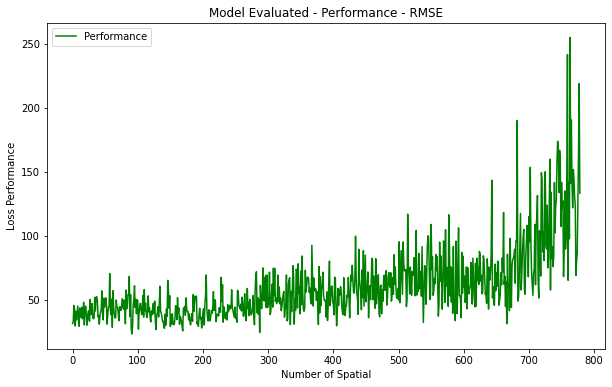

minimum RMSE:  23.14948081970215
minimum RMSE at epoch:  91
average:  60.562270197543924


In [24]:
plt.figure(figsize=(10,6))
plt.plot(eva[2], label='Performance', color='green')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Performance - RMSE')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss Performance')
plt.legend()
plt.show()
print('minimum RMSE: ', np.min(eva[2]))
print('minimum RMSE at epoch: ',np.argmin(eva[2]))
print('average: ', np.mean(eva[2]))